# Demo of RaCInG functionalities

In this notebook we will highlight some of RaCInG's main (Python) functionalities. Specifically, this notebook will focus on the following elements of the pipeline.

**Cell-cell interaction network construction**
- Reading input matrices provided by the R pipeline and turning them into Numpy arrays.
- Generating a graph instance based on the information in the Numpy arrays.

**Feature extraction from generated networks (Monte-Carlo method)**
- Extracting the triange and wedge count from a generated graphs.
- Combining the above into multiple monte-carlo simulations.

**Feature extraction from the network's kernel (Kernel method)**
- Computing the kernel.
- Generating direct communication features from the kernel.

**Statistical analysis and plot generation**
- Volcano plots based on Wilcoxon rank sum test and group fold-change.
- Producing conditional probabilities of ligand-receptor interactions for given cell-types.
- Correlation computation and plotting.
- Circos plot generation.

In the actual code all functions have been given docstrings that explain their functionality in more detail. Feel free to experiment and adapt parts of the code to fit your research needs.

In [1]:
import time #Package to time code

# Cell-cell interation network construction

Before we can generate networks we need to read the input data for RaCInG. This input data should be provided in .csv files with a pre-defined formatting. The specifics of this formatting is detailed in *Input_files_description.pdf* file. All functions to read input data for RaCInG are located in the *RaCInG_input_generation.py* file. Below we import the necissary module and read the example data. We have provided example .csv files (based on the TCGA SKCM dataset) in the *Example input* sub-folder.

&#x26A0; Make sure that the folder with the .csv files is a subfolder of the *Read_and_Generate_networks* folder.

In [2]:
# Estimated running time: 1 second
import RaCInG_input_generation as readIn
Lmatrix, Rmatrix, Cdistr, LRdistr, cellTypes, ligs, recs, _ = readIn.generateInput("min", "SKCM", folder = "Example input")

In the *generateInput* function takes a couple of inputs that mostly specifies the .csv file names:
- The first argument specifies the weight type used to generate the ligand-receptor quantification.
- The second argument specifies an identifier of the cancer type to be read.
- The final argument specifies the folder where the input data is located.
Note in the *Example input* folder that the names of the files follow a strict format. The parameters just used as input of the *generateInput* funciton are part of this format.

The seven output arrays summarize the input data provided to the model. 
- The *Lmatrix* stores the cell-type compatibility with ligands.
- The *Rmatrix* stores the cell-type compatibility with receptors.
- The *Cdistr* stores the cell-type quantification per patient. The index of axis 0 is the patient number.
- The *LRdistr* stores the ligand-receptor interaction quantification per patient. The index of axis 2 is the patient number.
- The *cellTypes* list stores the names of the cell-types.
- The *ligs* list stores the names of the ligands.
- The *recs* list stores the names of the receptors.

Once the input data is read, we can use RaCInG to generate graphs. Functionalities to do this are located in the *network_generation* file. Below we will read the function that generates networks and we will generate a small network consisting of N = 20 cells, and 40 ligand-receptor interactions (so avdeg = 2).

&#x26A0; Note that the network generation function will generate one network instance for the input data of one patient. It will not work if you give it the input data of all patients together.

In [3]:
# Estimated running time: less than 1 second

# We set a random seed to make the results in the demo reproducible
import numpy as np
np.random.seed(1)

import network_generation as netGen
# Note we use only data of patient 0 from the input data
V, E, types = netGen.model1(20, 2, Lmatrix, Rmatrix, Cdistr[0,:], LRdistr[:,:,0], genRandom = False)

The first two inputs are the the most important:
- The number of nodes.
- The average degree of the graph.
The other inputs consist of the input matrices we have just read (from .csv files) and the *genRandom* variable indicates whether we will generate networks from random data (which might be useful for testing purposes).

In the output of the network generation function *V* encodes the cell-type of each node, *E* encodes the node numbers that connect to form each arc (it is the edge list of the graph), and *types* encodes the ligand and receptor that makes up each connection. We will now show all output information after generating one network instance.

In [4]:
print("The cell-types of each cell in the network we just generated are:")
print(cellTypes[V]) #Should be all tumor cells with the exception of cell 2 (B-cell) and cell 14 (endothelial cell).
print("The arc list of the network is:")
print(E) #Should start with a connection from cell 8 (a tumor cell) to cell 15 (a tumor cell).
print("The ligands of each connection:")
print(ligs[types[:,0]]) #The connection from cell 8 to 15 should have ligand L1CAM form cell 8.
print("The recepors of each connection:")
print(recs[types[:,1]]) #The connection from cell 8 to 15 should have receptor ERBB2 from cell 15.

The cell-types of each cell in the network we just generated are:
['Tumor' 'Tumor' 'B' 'Tumor' 'Tumor' 'Tumor' 'Tumor' 'Tumor' 'Tumor'
 'Tumor' 'Tumor' 'Tumor' 'Tumor' 'Tumor' 'Endo' 'Tumor' 'Tumor' 'Tumor'
 'Tumor' 'Tumor']
The arc list of the network is:
[[ 8 15]
 [ 8 10]
 [ 0 18]
 [14 17]
 [14 15]
 [ 5  2]
 [ 9 11]
 [14  1]
 [12 14]
 [14  0]
 [14  0]
 [12  3]
 [14 12]
 [13  2]
 [ 2  1]
 [ 2  2]
 [13  2]
 [ 2  9]
 [ 2  2]
 [ 3 11]
 [14 13]
 [ 7 14]
 [12  2]
 [14  2]]
The ligands of each connection:
['L1CAM' 'THBS1' 'APP' 'TNFSF12' 'APOE' 'CDH1' 'SEMA3C' 'THBS1' 'ADM'
 'COL27A1' 'COL27A1' 'MFGE8' 'ANGPTL2' 'ICAM1' 'SEMA7A' 'TNFSF10' 'CCN2'
 'LGALS1' 'COPA' 'HLA-A' 'NECTIN3' 'ADAM15' 'CCN1' 'CXCL12']
The recepors of each connection:
['ERBB2' 'ITGB1' 'GPC1' 'TNFRSF12A' 'LRP1' 'ITGB7' 'PLXND1' 'ITGAV'
 'RAMP2' 'ITGA2' 'ITGB1' 'ITGAV' 'ITGB1' 'IL2RG' 'ITGB1' 'TNFRSF10A'
 'ITGB2' 'ITGB1' 'CD74' 'ERBB2' 'NECTIN2' 'ITGB3' 'ITGB2' 'CXCR4']


&#x26A0; Note that the final network has only 34 arcs instead of the promised 40. This is due to the fact RaCInG throws away ligand-receptor pairs it cannot pair to any of the cells. For example, this can happen when the sampled ligand-receptor pair includes a ligand that can only connect to NK cells while no NK cells are present among the cells in the network. If N is large enough, this problem disappears (since all cells will be sampled at least once with high probability).

To normalize, we will also have to generate networks with a different LR-distribution: one that is uniform over its support. Below is an example on how this distribution is generated, together with a generation of one network with this LR-distribution.

In [5]:
np.random.seed(1) # The same seed to compare with the previous output

# Making the LR-distribution uniform
LRdistrUniform = np.zeros_like(LRdistr)
normvec = 1 / np.count_nonzero(LRdistr, axis = (0,1)) 
for i in range(LRdistr.shape[2]):
    copy = LRdistr[:,:,i].copy()
    copy[copy > 0] = normvec[i]
    LRdistrUniform[:,:,i] = copy
    
# Generating one graph instance with the uniform LR-dsitribution (20 nodes, and ~40 arcs)
Vnorm, Enorm, typesNorm = netGen.model1(20, 2, Lmatrix, Rmatrix, Cdistr[0,:], LRdistrUniform[:,:,0], genRandom = False)

print("The cells have exactly the same types as before:")
print(cellTypes[Vnorm]) # Same output as the previous code block
print("But the arcs have changed due to the new distribution:")
print(Enorm) # Starts with [8, 2]
print(LRdistr[:,:,0])

The cells have exactly the same types as before:
['Tumor' 'Tumor' 'B' 'Tumor' 'Tumor' 'Tumor' 'Tumor' 'Tumor' 'Tumor'
 'Tumor' 'Tumor' 'Tumor' 'Tumor' 'Tumor' 'Endo' 'Tumor' 'Tumor' 'Tumor'
 'Tumor' 'Tumor']
But the arcs have changed due to the new distribution:
[[ 8  2]
 [ 2  2]
 [14 14]
 [13  3]
 [13 14]
 [ 2  0]
 [ 6  2]
 [12  8]
 [14 15]
 [ 5 15]
 [14 14]
 [14 10]
 [ 2 14]
 [14  1]
 [ 1  2]
 [ 8 14]
 [12 19]
 [ 3 10]
 [12  0]
 [17 18]
 [ 6 14]
 [ 2  1]
 [15 13]
 [ 9 14]
 [12  8]
 [14 13]]
[[0.00022817 0.00126946 0.00184664 ... 0.         0.         0.        ]
 [0.         0.00126946 0.00317481 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.00068388]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# Feature extraction and Monte-Carlo simulation

We have now generated one network instance from the model. Currently, the network is in arc list format. Usually, to extract properties from the graph, a (sparse) adjacency matrix format is more useful. Functionalities to do this transformation, are located in the *Utilities* file. We will provide an example of the transformation.

In [6]:
import Utilities as util
Adj = util.EdgetoAdj(E, len(V)) #This function retains arcs from cells to itself
AdjNoLoop = util.EdgetoAdj_No_loop(E, len(V)) #This function removes arcs from cells to itself
print("The adjacency matrix with self loops is:")
print(Adj) # You see that "(2, 2) 2" appears in the third row. There are two self-loops from cell 2 to itself.
print("The adjacency matrix without self loops is:")
print(AdjNoLoop) # This is the same matrix as before, but with "(2, 2) 2" removed.

The adjacency matrix with self loops is:
  (0, 18)	1
  (2, 1)	1
  (2, 2)	2
  (2, 9)	1
  (3, 11)	1
  (5, 2)	1
  (7, 14)	1
  (8, 10)	1
  (8, 15)	1
  (9, 11)	1
  (12, 2)	1
  (12, 3)	1
  (12, 14)	1
  (13, 2)	2
  (14, 0)	2
  (14, 1)	1
  (14, 2)	1
  (14, 12)	1
  (14, 13)	1
  (14, 15)	1
  (14, 17)	1
The adjacency matrix without self loops is:
  (0, 18)	1
  (2, 1)	1
  (2, 9)	1
  (3, 11)	1
  (5, 2)	1
  (7, 14)	1
  (8, 10)	1
  (8, 15)	1
  (9, 11)	1
  (12, 2)	1
  (12, 3)	1
  (12, 14)	1
  (13, 2)	2
  (14, 0)	2
  (14, 1)	1
  (14, 2)	1
  (14, 12)	1
  (14, 13)	1
  (14, 15)	1
  (14, 17)	1


In RaCInG we extract wedge and triangle counts. At this stage features are still directed, so for triangles we have implemented two types:
- **Cycle triangles:** Triangles with arcs from cell-type A to B to C and then back to A; labelled as (A, B, C).
- **Trust triangles:** Triangles with arcs from cell-type A to B which both have an arrow to C; labelled as (A, B, C).

Functionalities to extract triangle and wedge counts from networks are located in the *feature_extraction* file. We give an example with the network we have just turned into an adjacency matrix (with loops removed).

&#x26A0; Note that these feature extraction functions disregards multi-arcs. I.e., if there are two wedges from a cell A to a cell B, then the feature extraction function counts this as only one. This is not a big issue, since RaCInG produces sparse graphs, meaning the probability of multi-arcs is vanishingly small as the number of cells tends to infinity. 

In [7]:
import feature_extraction as feats
NoTT, listTT = feats.Trust_Triangles(AdjNoLoop)
NoCT, listCT = feats.Cycle_Triangles(AdjNoLoop)
NoW, listW = feats.Wedges(AdjNoLoop)

print("Number of trust triangles: " + str(NoTT) + ". List of trust triangles:") #There should be 4
print(listTT) #Should start with [2, 12, 14]
print("Number of cycle triangles: " + str(NoCT) + ". List of cycle triangles:") #There should be 0
print(listCT) #Should only have the triangles []
print("Number of wedges: " + str(NoW) + ". List of wedges:") #There should be 27
print(listW) #Should start with [2, 9, 11]

Number of trust triangles: 4. List of trust triangles:
[[ 2 12 14]
 [ 1 14  2]
 [ 2 14 12]
 [ 2 14 13]]
Number of cycle triangles: 0. List of cycle triangles:
[]
Number of wedges: 27. List of wedges:
[[ 2  9 11]
 [ 5  2  1]
 [ 5  2  9]
 [ 7 14  0]
 [ 7 14  1]
 [ 7 14  2]
 [ 7 14 12]
 [ 7 14 13]
 [ 7 14 15]
 [ 7 14 17]
 [12  2  1]
 [12  2  9]
 [12  3 11]
 [12 14  0]
 [12 14  1]
 [12 14  2]
 [12 14 13]
 [12 14 15]
 [12 14 17]
 [13  2  1]
 [13  2  9]
 [14  0 18]
 [14  2  1]
 [14  2  9]
 [14 12  2]
 [14 12  3]
 [14 13  2]]


Instead of a raw list of cells that form e.g. a wedge, it's more usefull to have a summary array which counts the number of wedges from each collection of cell-types. In *Utilities* there is function that does this. If needed, it also corrects for symmetries in the feature.

In [8]:
typeCount = util.Count_Types(listW, V)
print(typeCount)
# A very sparse matrix. Most nonzero entries occur at the right-most column of each slide.
# A notable output is the 11 in the middle and 6 at the top of the right-most column of the last slice.
# This means there are 1 wedges of the form Tumor -> Endo -> Tumor and 6 of the form Tumor -> B -> Tumor.

[[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]]

 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  

By averaging over this count matrix for each network in the monte-carlo simulation, we get the (non-normalized, non-uniform) feature values of a given patient. To get the uniform values we do the same, but in this case graphs are generated with the uniform LR-distribution each time. By dividing the non-uniform value by the uniform one, we get the normalized feature value of a patient.

If you are not planning to adapt the pipeline, the file *execute_sim* combines all the above steps, and allows you run the monte-carlo method in one function. There are two general options to do this: either you extract a desired feature from one patient at a time (usefull if e.g. you want to run RaCInG on a computing cluster paralalized over the patients) or you extract all features from all patients with one function call. We will give examples of both below.

In [9]:
np.random.seed(1)

import execute_sim as monteCarlo

#Running time: ~3 minutes. Output counted 4667378.6 wedges on average with a standard deviation of roughly 160539.4
monteCarlo.runSimOne("SKCM", "min", "W", 0, N = 5000, itNo = 10, av = 15, norm = False, folder = r"Example input")

0,5000,15
['B' 'CAF' 'CD8+ T' 'DC' 'Endo' 'M' 'NK' 'Treg' 'Tumor']
Count,4667378.6,160539.38352267334
Composition - Average:
0,0,0,178.7
0,0,1,618.3
0,0,2,73.3
0,0,3,207.7
0,0,4,361.3
0,0,5,1209.6
0,0,6,0.0
0,0,7,704.2
0,0,8,1952.3
0,1,0,650.2
0,1,1,3481.5
0,1,2,204.8
0,1,3,716.1
0,1,4,2930.0
0,1,5,4855.2
0,1,6,0.0
0,1,7,1474.0
0,1,8,20757.7
0,2,0,67.8
0,2,1,242.5
0,2,2,18.1
0,2,3,86.3
0,2,4,108.3
0,2,5,542.0
0,2,6,0.0
0,2,7,240.8
0,2,8,649.6
0,3,0,263.9
0,3,1,1053.9
0,3,2,71.9
0,3,3,253.1
0,3,4,566.2
0,3,5,1646.5
0,3,6,0.0
0,3,7,901.5
0,3,8,4305.6
0,4,0,475.8
0,4,1,3021.8
0,4,2,125.3
0,4,3,419.7
0,4,4,2555.7
0,4,5,3285.6
0,4,6,0.0
0,4,7,1207.7
0,4,8,13316.8
0,5,0,1354.0
0,5,1,4194.1
0,5,2,399.9
0,5,3,1291.2
0,5,4,3494.0
0,5,5,8877.8
0,5,6,0.0
0,5,7,4649.9
0,5,8,24689.2
0,6,0,0.0
0,6,1,0.0
0,6,2,0.0
0,6,3,0.0
0,6,4,0.0
0,6,5,0.0
0,6,6,0.0
0,6,7,0.0
0,6,8,0.0
0,7,0,372.4
0,7,1,1335.1
0,7,2,202.1
0,7,3,297.7
0,7,4,1216.3
0,7,5,2433.3
0,7,6,0.0
0,7,7,1425.2
0,7,8,4152.8
0,8,0,57.1
0,8,1,3

In the above execution for the monte-carlo method we have extracted the non-uniform results for patient zero. In the function call the following parameters were used (in order):
- The identifier of the cancer type (to read in the input data).
- The identifier of the weights used (to read in the input data).
- The type of fingerprint to be extracted using the monte-carlo method (W: wedge, TT: trust triangle, CT: cycle triangle).
- The number of the patient to be analysed
- The amount of cells per network (for network generation).
- The amount of networks per monte-carlo simulation.
- The average degree of each network (for network generation).
- An indicater whether the LR-distribution should be made uniform.
- The folder where the input data is located.

In [10]:
np.random.seed(1)

#Running time: ~4 minutes
monteCarlo.runSim("SKCM", "min", "W", pats = 30, N = 1000, itNo = 10, av = 5, norm = False, folder = r"Example input")

In the above execution each parameter has the same interpretation as before, except for *pats* we provides an upper limit on the number of patients included in the analysis. In this demo only the first 30 patients will be considered in the analysis, but by setting the parameter to "all", you can include all patients.

The output of the previous step is a .txt file named "SKCM_W_5.txt". To get the normalized feature values we execute the monteCarlo method again for uniform LR-interactions, and we divide the average results of the two runs. The file *txt_to_csv* handles this process. The file ensures that a correctly formatted .csv file is generated with the results for the statistical analysis. Moreover, it handles exception cases (e.g. 0/0 cases). The code below generates the equivalent file with the results from uniform LR-input, and creates the corresponding .csv file.

&#x26A0; The code below will say that the results of quite a lot of patients failed. This is the case, since the input file suggests there are 467 patients to be processed, but the file "SKCM_W_5.txt" suggest only 30 of them are present. Normally, this functionality is used to show the user where monte-carlo simulations have failed (e.g. due to quircks in a HPC environment).

In [11]:
np.random.seed(1)

#Running time: ~5 minutes
import txt_to_csv as convert
monteCarlo.runSim("SKCM", "min", "W", pats = 30, N = 1000, itNo = 10, av = 5, norm = True, folder = r"Example input")
convert.Generate_normalised_count_csv("SKCM", "min", "W", average = 5, noCells = 1000, folder = r"Example input", remove_direction = True)

These patients went wrong for non-normalised: (array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 

,B_B_B,B_B_CAF,B_B_CD8,B_B_DC,B_B_Endo,B_B_M,B_B_NK,B_B_Treg,B_B_Tumor,B_CAF_B,...,Treg_Tumor_Tumor,Tumor_B_Tumor,Tumor_CAF_Tumor,Tumor_CD8_Tumor,Tumor_DC_Tumor,Tumor_Endo_Tumor,Tumor_M_Tumor,Tumor_NK_Tumor,Tumor_Treg_Tumor,Tumor_Tumor_Tumor
TCGA-3N-A9WB-06,0.274510,0.368778,0.179487,0.301887,0.430876,0.375254,1.000000,0.250986,0.487017,0.433898,...,1.054118,0.785551,1.584957,0.179144,0.873439,1.464293,2.117375,1.000000,0.294732,4.229866
TCGA-3N-A9WC-06,0.888889,0.386667,1.423077,0.689655,0.500000,1.054545,0.000000,1.705882,0.872549,0.312500,...,1.247505,0.831429,0.576723,1.808381,1.445485,0.588238,1.881115,0.129284,0.870112,1.659127
TCGA-3N-A9WD-06,1.302832,1.018258,1.009324,1.357143,0.954861,1.016912,1.307692,1.000000,1.210766,0.607639,...,1.000000,1.378685,0.835523,1.088376,1.546440,1.362800,1.597978,0.204267,1.000000,2.542024
TCGA-BF-A1PU-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.513970,1.000000,0.514012,1.661166,1.505165,1.000000,1.000000,3.911468
TCGA-BF-A1PV-01,0.440000,0.346895,1.000000,0.481752,0.479487,0.424603,1.000000,0.254697,0.487640,0.450450,...,1.460956,0.450595,1.383296,1.000000,0.792928,1.501685,1.475970,1.000000,0.461268,4.864235
TCGA-BF-A1PX-01,1.000000,0.339286,0.596154,0.428571,0.511628,0.368421,0.277778,0.111111,0.272727,3.000000,...,1.079310,0.693467,0.905942,1.590538,1.042378,1.042740,1.437742,0.678431,0.737705,1.675686
TCGA-BF-A1PZ-01,0.935484,1.024169,0.906137,0.584416,1.000000,0.548857,0.833333,0.927203,1.279601,0.942857,...,1.707224,1.677689,1.125559,0.931671,1.397213,0.000000,3.044188,0.280067,0.877327,3.458146
TCGA-BF-A1Q0-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.860933,1.000000,1.337980,0.735302,1.340004,1.161329,1.841092,0.637759,0.791724,3.309902
TCGA-BF-A3DJ-01,0.000000,0.588235,0.250000,0.516129,0.333333,0.483871,1.000000,0.520000,0.362069,0.392857,...,1.210811,0.394628,0.771430,0.280237,1.300691,1.155027,2.240772,0.486339,0.549076,2.397285
TCGA-BF-A3DL-01,0.312500,0.329825,0.255319,0.428571,0.331034,0.292639,0.000000,0.325648,0.349412,0.439490,...,1.421151,0.510714,1.348066,0.737175,1.201967,1.510636,1.565109,0.380297,0.437071,3.714037


The *Generate_normalised_count_csv* function in *txt_to_csv* can only be used for wedges (W), trust triangles (TT) and cycle triangles (CT). Most of its input parameters will speak for itself and should match the parameters with which networks have been generated, but an important parameter to note is "remove_direction". If true, it will accumulate all the different directed features of a type and create the output .csv file with undirected features.

# Feature extraction from the network's kernel

Individual functions to compute the kernel or direct communication values for a given group of patients is given in the *Theoretical_Direct_Communication* file. The functions in these files will not save their output by default. Note that no randomness is involved when computing the kernel (or direct communication values). Below we compute the kernel for the first 2 patients of the input data in this demo, and print the kernel of patient 0.

In [12]:
import Theoretical_Direct_Communication as theory

#Runtime: ~3 minutes
out = theory.Calculate_kernel(Lmatrix, Rmatrix, Cdistr[:2,:], LRdistr[:,:,:2], normalize = False)
print(out[:,:,0])

0
1
[[6.66780892e+01 4.15893476e+01 2.12646099e+02 1.24215711e+02
  6.57573233e+01 1.04617462e+02 3.27155537e+04 8.48953578e+01
  2.30398235e+00]
 [6.56908045e+01 7.60564807e+01 2.07091326e+02 1.40533289e+02
  1.97922759e+02 1.31949276e+02 3.27306743e+04 5.16745172e+01
  7.63185043e+00]
 [6.16886928e+01 4.22001863e+01 1.78737162e+02 1.43469824e+02
  5.84911562e+01 1.41592971e+02 3.27011643e+04 9.26401713e+01
  2.07570903e+00]
 [8.48675305e+01 6.41828878e+01 2.44902225e+02 1.51960289e+02
  9.56865460e+01 1.31285129e+02 3.27284384e+04 1.01535084e+02
  4.56749340e+00]
 [8.16225850e+01 1.12087428e+02 1.92291465e+02 1.33027362e+02
  3.86033267e+02 1.49091417e+02 3.27616636e+04 7.41048831e+01
  8.02519737e+00]
 [6.99229587e+01 4.45671261e+01 1.81442142e+02 1.26113967e+02
  1.03796382e+02 1.21407506e+02 3.27178942e+04 8.94102223e+01
  4.60194721e+00]
 [1.22743698e+08 2.91636927e+06 3.75365225e+09 1.23369707e+08
  1.75693646e+06 1.23369707e+08 3.75368474e+09 1.22771352e+08
  1.26714146e+06]
 [

The variable "normalize" gives one the option to compute the kernel with the uniform input data. The output of the previous step should provide (approximately) the following kernel:

| Cells | B | CAF | CD8 | DC | Endo | M | NK | Treg | Tumor |
| -: | :- | :- | :- | :- |:- | :- |:- | :- |:- |
| B| 66.68 | 41.59| 212.6 |124.2 |65.76 | 104.6 | 327156 | 84.90 |2.304 |
| CAF | 65.69| 76.06| 207.1 | 140.51 |197.2 |131.9|32731|51.67|7.632|
| CD8 | 61.69 | 42.20 | 178.7 |143.5 |58.49 | 141.63 |32701 |92.64|2.076 |
| DC | 84.87 | 64.18 | 245.0 |152.0 |95.69 |131.3 |32728 |101.5|4.567 |
| Endo | 81.62 | 112.1 | 192.2 |133.0 |386.0 |149.1 |32762 |74.10|8.025 |
| M | 69.92 | 44.57 | 181.4 |126.1 |103.8 | 121.4 |32718 |89.41|4.602 |
| NK | 100000+ | 100000+ | 100000+ |100000+|100000+| 100000+|100000+ |100000+|100000+ |
| Treg | 32.94 | 21.19 | 158.0 | 41.87 |53.28 | 48.26 | 100000+ |42.50|1.263 |
| Tumor | 1.895 | 2.019 | 8.736 |3.487 |5.188 | 3.495 |32570 |1.488|0.295 |


You can also use the *execute_sim* file to compute direct communication values with the kenel method. Simply specify the feature marker for direct communication (D). Many of the input parameters are not used in this case, since the kernel method does not require information about number of cells, number of iterations, or average degree. Feature extraction through *execute_sim* will save the results.

In [13]:
#Running time: ~3 minutes
monteCarlo.runSim("SKCM", "min", "D", pats = 2, N = 1000, itNo = 10, av = 5, norm = False, folder = r"Example input")

#We print the Cdistr of patient 0 for reference
print(Cdistr[0,:])

[3.74253354e-03 1.77844131e-02 4.76323498e-04 2.38498306e-03
 7.16542552e-03 1.51596465e-02 6.11060924e-10 1.08919110e-02
 9.42394763e-01]


The output will be a file "SKCM_D.out" with direct communication values. Note how the numbers in this file relate to the kernel. For example, if we look at the results for patient 0 we see that the direct communication feature for Tumor -> Tumor communication is given by (approximately) $$\kappa(\text{Tumor}, \text{Tumor}) \cdot q_{\text{Tumor}} \cdot q_{\text{Tumor}} \approx 0.295 \cdot 0.942 \cdot 0.942 \approx 0.262.$$

# Statistical analysis and plot generation: volcano plot and biggest differences

We have now generated some results, so it is time to apply some statistical analysis to it, and generate plots. Where possible, we will use the results from the .csv files or .out files we have just generated. We will generate slightly more results (W counts for the STAD dataset) in order to show all basic functionalities of the statistical analysis. 

In [14]:
import execute_sim as monteCarlo
import txt_to_csv as convert
import numpy as np
np.random.seed(1) #For reproducibility

#Runtime: ~8 minutes
monteCarlo.runSim("STAD", "min", "W", pats = 30, N = 1000, itNo = 10, av = 5, norm = False, folder = r"Example input")
monteCarlo.runSim("STAD", "min", "W", pats = 30, N = 1000, itNo = 10, av = 5, norm = True, folder = r"Example input")
convert.Generate_normalised_count_csv("STAD", "min", "W", average = 5, noCells = 1000, folder = r"Example input", remove_direction = True)

These patients went wrong for non-normalised: (array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 

The file *statistical_analysis.py* handles most of the functions used to generate pictures. The first step will be to read all the data we have generated. The function *readAllData* handles this. It requires us the specify the following information:
- Identifiers for all cancer types we want to combine for a pan-cancer analysis.
- Identifiers for all cancer types we want to compare with the cancer types in the pan-cancer analysis.
- The names of the features we include in our analysis.
- The cell-types we wish to exclude from the analysis (optional).
- The number of cells used in every simulation (used to find the correct files).
- The average degree used to generate networks (used to find the correct files).
- The weight type used to generate the LR-distribution (used to find the correct files).
- An indication whether directionality was removed when extracting network features.

In [15]:
import statistical_analysis as stats
data, features, noFeatures = stats.readAllData(["SKCM", "STAD"], ["SKCM"], ["W"], remove_celltypes = ["NK"], noCells = 1000, average = 5, weight = "min", bundle = True)

data["SKCM"]

We have 288 unique features in SKCM.
We have 288 unique features in STAD.


,Unnamed: 0,B_B_B,B_B_CAF,B_B_CD8,B_B_DC,B_B_Endo,B_B_M,B_B_Treg,B_B_Tumor,B_CAF_B,...,Treg_Tumor_Treg,Treg_Tumor_Tumor,Tumor_B_Tumor,Tumor_CAF_Tumor,Tumor_CD8_Tumor,Tumor_DC_Tumor,Tumor_Endo_Tumor,Tumor_M_Tumor,Tumor_Treg_Tumor,Tumor_Tumor_Tumor
0,TCGA-3N-A9WB-06,0.274510,0.368778,0.179487,0.301887,0.430876,0.375254,0.250986,0.487017,0.433898,...,0.186441,1.054118,0.785551,1.584957,0.179144,0.873439,1.464293,2.117375,0.294732,4.229866
1,TCGA-3N-A9WC-06,0.888889,0.386667,1.423077,0.689655,0.500000,1.054545,1.705882,0.872549,0.312500,...,1.294118,1.247505,0.831429,0.576723,1.808381,1.445485,0.588238,1.881115,0.870112,1.659127
2,TCGA-3N-A9WD-06,1.302832,1.018258,1.009324,1.357143,0.954861,1.016912,1.000000,1.210766,0.607639,...,1.000000,1.000000,1.378685,0.835523,1.088376,1.546440,1.362800,1.597978,1.000000,2.542024
3,TCGA-BF-A1PU-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.513970,1.000000,0.514012,1.661166,1.505165,1.000000,3.911468
4,TCGA-BF-A1PV-01,0.440000,0.346895,1.000000,0.481752,0.479487,0.424603,0.254697,0.487640,0.450450,...,0.358289,1.460956,0.450595,1.383296,1.000000,0.792928,1.501685,1.475970,0.461268,4.864235
5,TCGA-BF-A1PX-01,1.000000,0.339286,0.596154,0.428571,0.511628,0.368421,0.111111,0.272727,3.000000,...,0.666667,1.079310,0.693467,0.905942,1.590538,1.042378,1.042740,1.437742,0.737705,1.675686
6,TCGA-BF-A1PZ-01,0.935484,1.024169,0.906137,0.584416,1.000000,0.548857,0.927203,1.279601,0.942857,...,0.633333,1.707224,1.677689,1.125559,0.931671,1.397213,0.000000,3.044188,0.877327,3.458146
7,TCGA-BF-A1Q0-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.403226,1.860933,1.000000,1.337980,0.735302,1.340004,1.161329,1.841092,0.791724,3.309902
8,TCGA-BF-A3DJ-01,0.000000,0.588235,0.250000,0.516129,0.333333,0.483871,0.520000,0.362069,0.392857,...,0.626263,1.210811,0.394628,0.771430,0.280237,1.300691,1.155027,2.240772,0.549076,2.397285
9,TCGA-BF-A3DL-01,0.312500,0.329825,0.255319,0.428571,0.331034,0.292639,0.325648,0.349412,0.439490,...,0.548571,1.421151,0.510714,1.348066,0.737175,1.201967,1.510636,1.565109,0.437071,3.714037


The output of the previous step is a dictionary with data that has just been read for each cancer type. Since we only include SKCM in our analyisis, our dictionary only has one entry (the SKCM dataframe). We will now add metadata to this dataframe. The function *addMetadata* handles this. We need to feed this function the data we have just read, the cancer types we want to add metadata to, and the type of metadata (e.g. MFP subtype) we want to add to the dataframe. The output will be the same dictionary with dataframes, but now the final column of each dataframe will include information about metadata.

&#x26A0; Make sure for each cancer type that the metadata file has the format "metadata_{cancer-type}.csv". These files should be located in the same directory as the demo. Aditionally, the function also tries to read metadate from an excel file called "Bagaev_mmc6.xlsx" (since in our study metadata was often located in this file), but in this demo this will (hopefully) fail.

In [16]:
#Just like the data we've just read, we need to specify both the cancer types for pan-cancer analysis (second argument)
#and the ones that we seek to compare with pan cancer analysis (third argument). For both types of analyses, we need to 
#specify the type of meta-data separately (fourth and fifth argument, respectively).
data = stats.addMetadata(data, ["SKCM", "STAD"], ["SKCM"], "MFP", "MFP")

data["SKCM"]

Bagaev did not work for SKCM
Bagaev did not work for STAD
Bagaev did not work for SKCM


,Unnamed: 0,B_B_B,B_B_CAF,B_B_CD8,B_B_DC,B_B_Endo,B_B_M,B_B_Treg,B_B_Tumor,B_CAF_B,...,Treg_Tumor_Tumor,Tumor_B_Tumor,Tumor_CAF_Tumor,Tumor_CD8_Tumor,Tumor_DC_Tumor,Tumor_Endo_Tumor,Tumor_M_Tumor,Tumor_Treg_Tumor,Tumor_Tumor_Tumor,MFP
0,TCGA-3N-A9WB-06,0.274510,0.368778,0.179487,0.301887,0.430876,0.375254,0.250986,0.487017,0.433898,...,1.054118,0.785551,1.584957,0.179144,0.873439,1.464293,2.117375,0.294732,4.229866,D
1,TCGA-3N-A9WC-06,0.888889,0.386667,1.423077,0.689655,0.500000,1.054545,1.705882,0.872549,0.312500,...,1.247505,0.831429,0.576723,1.808381,1.445485,0.588238,1.881115,0.870112,1.659127,IE
2,TCGA-3N-A9WD-06,1.302832,1.018258,1.009324,1.357143,0.954861,1.016912,1.000000,1.210766,0.607639,...,1.000000,1.378685,0.835523,1.088376,1.546440,1.362800,1.597978,1.000000,2.542024,IE/F
3,TCGA-BF-A1PU-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.513970,1.000000,0.514012,1.661166,1.505165,1.000000,3.911468,D
4,TCGA-BF-A1PV-01,0.440000,0.346895,1.000000,0.481752,0.479487,0.424603,0.254697,0.487640,0.450450,...,1.460956,0.450595,1.383296,1.000000,0.792928,1.501685,1.475970,0.461268,4.864235,D
5,TCGA-BF-A1PX-01,1.000000,0.339286,0.596154,0.428571,0.511628,0.368421,0.111111,0.272727,3.000000,...,1.079310,0.693467,0.905942,1.590538,1.042378,1.042740,1.437742,0.737705,1.675686,IE/F
6,TCGA-BF-A1PZ-01,0.935484,1.024169,0.906137,0.584416,1.000000,0.548857,0.927203,1.279601,0.942857,...,1.707224,1.677689,1.125559,0.931671,1.397213,0.000000,3.044188,0.877327,3.458146,D
7,TCGA-BF-A1Q0-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.860933,1.000000,1.337980,0.735302,1.340004,1.161329,1.841092,0.791724,3.309902,D
8,TCGA-BF-A3DJ-01,0.000000,0.588235,0.250000,0.516129,0.333333,0.483871,0.520000,0.362069,0.392857,...,1.210811,0.394628,0.771430,0.280237,1.300691,1.155027,2.240772,0.549076,2.397285,F
9,TCGA-BF-A3DL-01,0.312500,0.329825,0.255319,0.428571,0.331034,0.292639,0.325648,0.349412,0.439490,...,1.421151,0.510714,1.348066,0.737175,1.201967,1.510636,1.565109,0.437071,3.714037,D


Since we have feature values and metadata, we can now start making volcano plots. To do this, we will first group the patients according to their MFP in both the pan-cancer other datasets, after which we combine all pan-cancer datasets into one pan-cancer dataframe. The functions *groupPatients* and *createPanCancerData* handle this. Note that we again need to indicate the pan-cancer datasets, and the labels of the groups to compare with the pan-cancer datasets. We also need to provide group identifiers for both the pan-cancer (first) and other datasets (later). Finally, we need to indicate for both groups what kind of meta-data we are dealing with (in the same order). Below an example. 

In [17]:
groups = stats.groupPatients(data, ["SKCM", "STAD"], ["SKCM"], ["IE", "D"], ["IE", "D"], "MFP", "MFP")
pan_data, pan_labels = stats.createPanCancerData(groups, ["SKCM", "STAD"], ["IE", "D"], noFeatures)

In cancer SKCM group IE has size 6
In cancer SKCM group D has size 14
In cancer STAD group IE has size 10
In cancer STAD group D has size 3
In cancer SKCM group IE has size 6
In cancer SKCM group D has size 14


Now we have split the data up in specific groups according to meta-data, we can test for differences between them. We use the wilcoxen rank sum test for this, and the procedure to test is implemented in the *wilcoxon* function. It will output the p-values of the test for each feature, the fold-changes between average feature values of each group, and a list of features that are deemed significant under the chosen alpha (after Bonferroni correction). The function does this both for the pan-cancer analysis and all the cancer types we later wish to compare to the pan-cancer setting individually.

In [18]:
pvals, folds, signif, panPvals, panFolds, panSignif = stats.wilcoxon(data, groups, ["SKCM"], ["IE", "D"], pan_data, pan_labels, \
                                      ["IE", "D"], features, noFeatures, alpha = 0.05)

print("The significant features in the pan cancer analysis are:")
features[panSignif["IE_D"]]

The significant features in the pan cancer analysis are:


Index(['CAF_Tumor_Endo', 'CAF_Tumor_Tumor', 'CD8_Tumor_M', 'Endo_Endo_Tumor',
       'M_Endo_Tumor', 'M_M_M', 'Tumor_Endo_Tumor', 'Tumor_Tumor_Tumor'],
      dtype='object')

Based on this output, we can create volcano plots. The function *volcanoPan* does this for the pan-cancer data, and *volcanoInd* for the individual cancer datasets.

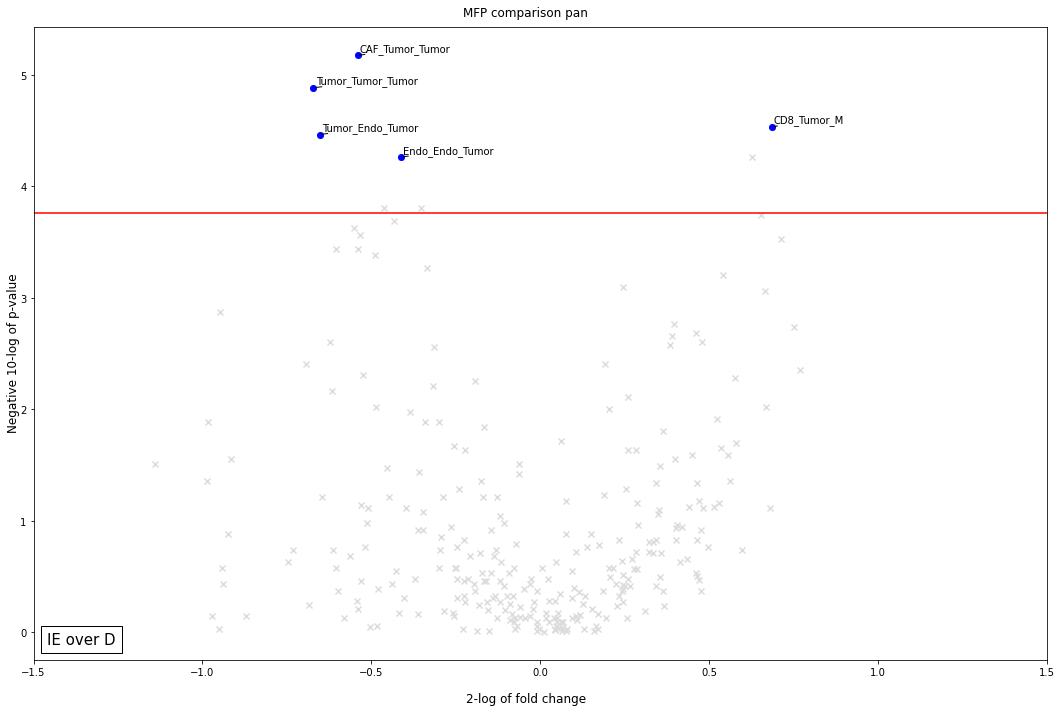

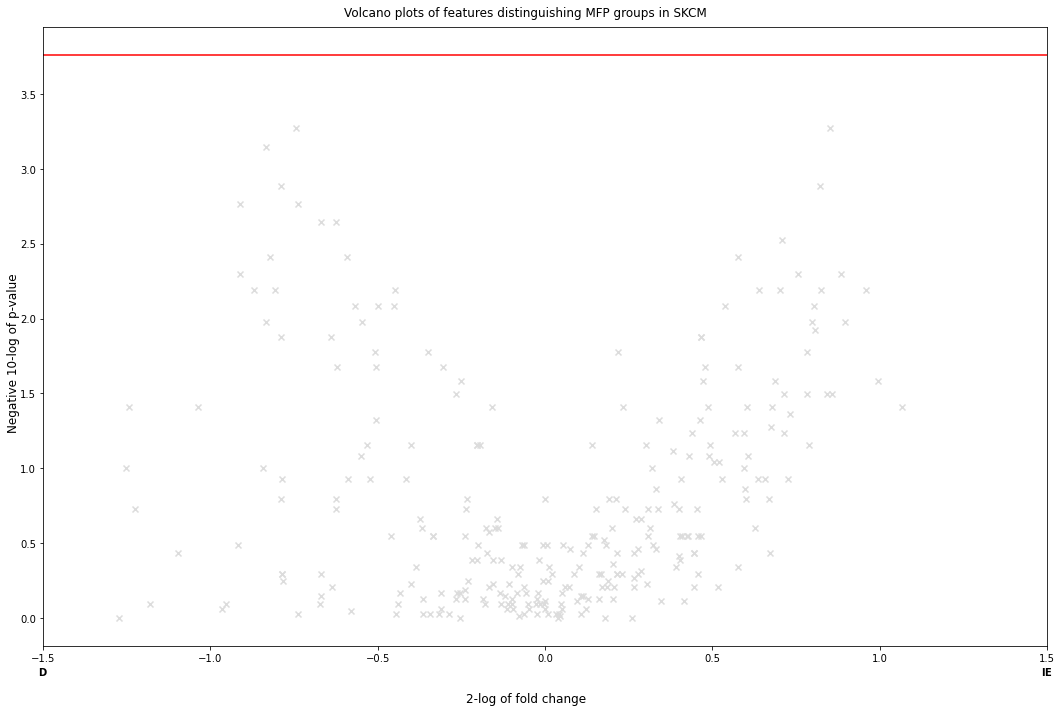

In [19]:
stats.volcanoPan(panPvals, panFolds, panSignif, ["IE", "D"], features, ["W"], "MFP", "pan",\
                 noFeatures, alpha = 0.05, thresh = 5, save = False)
stats.volcanoInd(pvals, folds, signif, ["IE","D"], features, ["W"], "MFP", ["SKCM"],\
                 noFeatures, alpha = 0.05, thresh = 5, save = False)

To generate the two figures above, the function plotted the fold changes of each feature against their p-value. With the variable *thresh = 5* we have indicated that we want the the five features with the lowest p-value to be highlighted and labelled if they are significant. For the pan-cancer result, we see there are some significant results above the red line. The five of those with the smallest p-value have been coloured and labeled. For the SKCM analysis we see there are no significant results, so no feature is coloured.

Apart from generating volcano plots for individual or pan-cancer comparisons, we can also compare the the results of the individual cancer-types with the pan-cancer result, and highlight the biggest differences. This is done with the *findLargeFold* and the *heatmap* funciton. The former will find the features for which the individual cancer type result differs the most from the pan-cancer result, while the latter will plot these results in a sort of scatter plot. Below an example for our data.

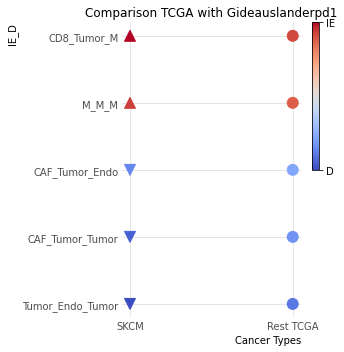

In [20]:
bigDiffFeat, warning = stats.findLargeFold(panPvals, pvals, panFolds, folds, panSignif, signif, ["IE", "D"],\
                                           ["SKCM"], noFeatures, thresh = 5)
stats.heatmap(bigDiffFeat, warning, panPvals, pvals, panFolds, folds, panSignif, signif, ["IE", "D"], \
              "Pan", ["SKCM"], features, "MFP", ["W"], noFeatures, thresh = 5, save = False)

# Ligand-receptor interaction for specific communication types

If in the previous analyses a certain feature stands out, we might want to look into the specific ligand-receptor pairs that cause the difference. To look into this, we can use the file *retrieveLigRecInfo.py* and the function *createPicture* within it. This function will calculate the probabilities of each LR-pair conditioned on conditioned on them being present in the chosen interaction. Finally, it will create a picture with the LR-interaction that got the highest score. Below, we will try it for the CAF - Tumor interaction in STAD. Note that the function has the possibility to input a third cell type (currently inputted as "Not used"). This cell type only needs to be inputted if you want to delve into the ligand-receptor pairs that make up a triangle interaction.

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

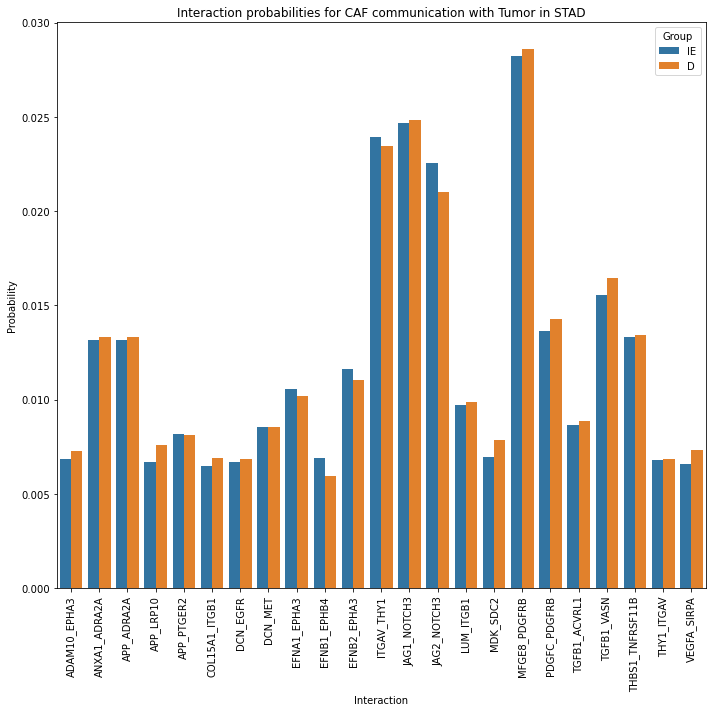

In [21]:
import retrieveLigRecInfo as LRinfo
#Runtime: ~10 minutes
LRinfo.createPicture("min", "STAD", "CAF", "Tumor", "Not used", "IE", "D", "MFP", 20, "Example input", triangle = False)


# Statistical analysis and plot generation: correlation and circos plots

We can also look at the correlation between features from RaCInG and immune response score. The funciton *computeCorrelation* in *statistical_analysis.py* handles this. This function requires a .csv file with the immune response scores of all patients in it. It will read the file, compute the spearman rho correlation between each set of feature values and the immune response score, and plot features with the largest (absolute) correlation.

&#x26A0; Make sure the name of the file with immune response scores is called "immuneresponse_score_{cancer-type}.csv" and located in the same directory as the demo.

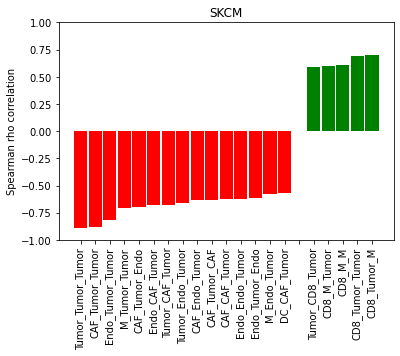

In [22]:
try:
    del data["STAD"] #Since we do not have an immune response score csv for STAD, we will remove it from the data dictionary.
except:
    print("STAD data already deleted.")
stats.computeCorrelation(data, thresh = 20, save = False)

Finally, we can also construct circos plots based on the (kernel derived) direct communication values. For this, we have used a tool called "circos" (see: http://mkweb.bcgsc.ca/tableviewer/). This tool requires a .txt file as input to generate the plot. The file *circos.py* and the function *createCircosTxt* handles this. This function reads direct communcation values for a group of patients from a (numpy) .npz file, averages it over the patients belonging to a group, and creating the desired .txt file. Below is an example of first generating the .npz file and then using it to create the circos plot .txt file.

&#x26A0; Currently, this function suffers from the issue that it cannot recognize patients from the .npz file. Thus, if the metadatafile does not include its patients in the same order as the .npz file, then the wrong meta-data label is assigned to them. The example below suffers from this issue.

In [23]:
import Circos
s = time.time()
Lmatrix, Rmatrix, Cdistr, LRdistr, cellTypes, ligs, recs, _ = readIn.generateInput("min", "STAD", folder = "Example input")
out = theory.Calculate_expected_communication_probabilities(Lmatrix, Rmatrix, Cdistr[:3,:], LRdistr[:,:,:3], normalize = False)
theory.Save_Direct_Communication(out, cellTypes, "kernel_SKCM.npz")
Circos.createCircosTxt("SKCM", "D", 1000, "circos_SKCM_D.txt", folder = "Example input", feature = "MFP")
e = time.time()
print(e - s)

288.0761513710022


In the above example we first indicated the cancer type, then the meta-group we wanted to generate a circos plot for, and then an inflation factor. This inflation factor needs to be specified, since circos requires the input to be integers. Direct communication values are numbers between 0 and 1, so the inflation factor multiplies all values in the direct communication list with a fixed factor to ensure each feature is fairly respresented (as a rounded integer) in the .txt file. The final three inputs are the name of the file the output is written to, the name of the folder where the metadata is located and the name of the metadata feature. You can now upload the output .txt file to the circos online envoronment and create the figure. This also concludes our demo. We did not cover the files *Tarjan.py* (used to calculate the size and composition of the giant strongly connected component in a graph) and *HPC_CLI.py* (a utility file used to generate SLURM scripts to run RaCInG in a HPC environment), since there are not of main interest when applying RaCInG. We hope that you will find RaCInG usefull for your own research!